In [1]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData
from stopsignalmetrics.ssrtmodel import SSRTmodel

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

## Suffix
### Indicates which set of results to view

In [2]:
suffix = 'SSRTscale-25'

# SSRT by SSD

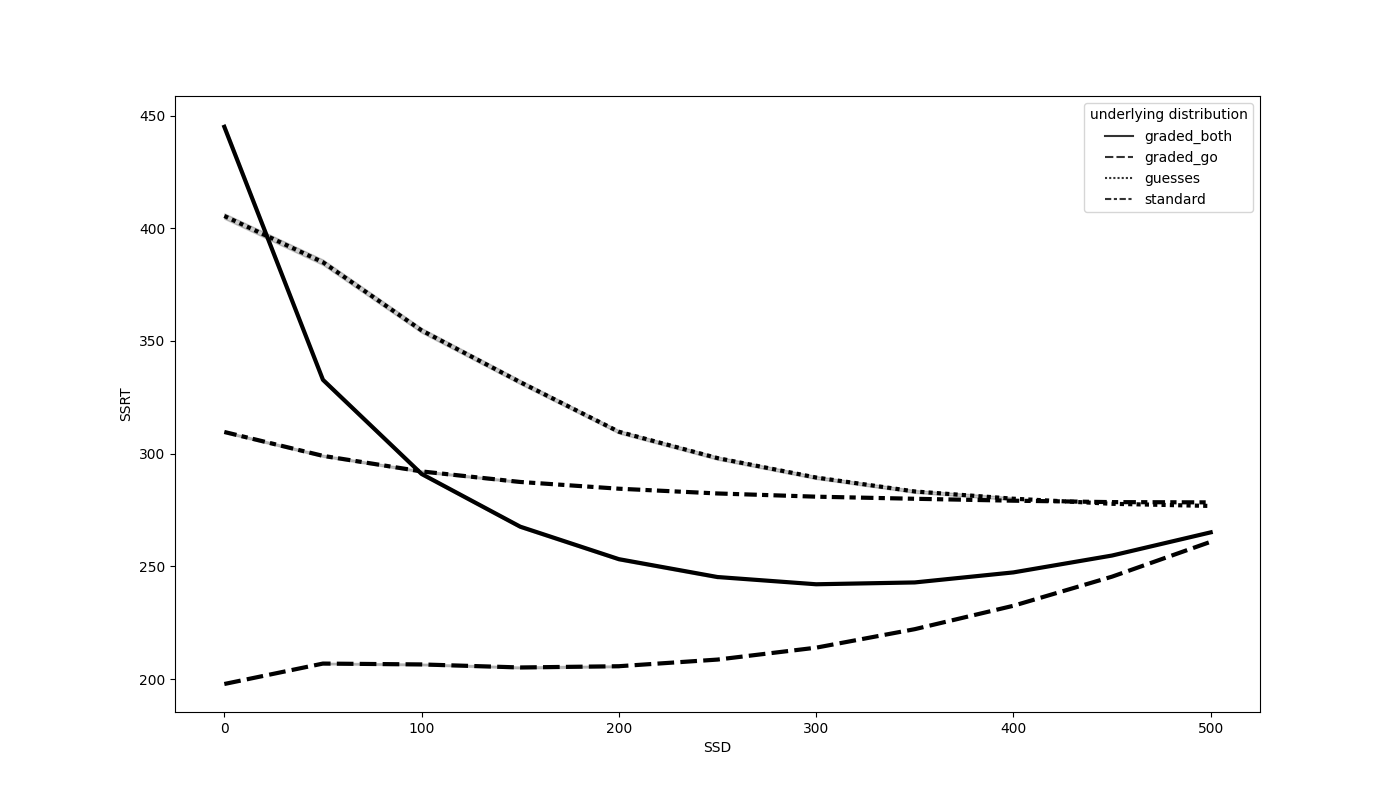

In [3]:
Image('figures/%s/SSRT_by_SSD.png' % suffix)

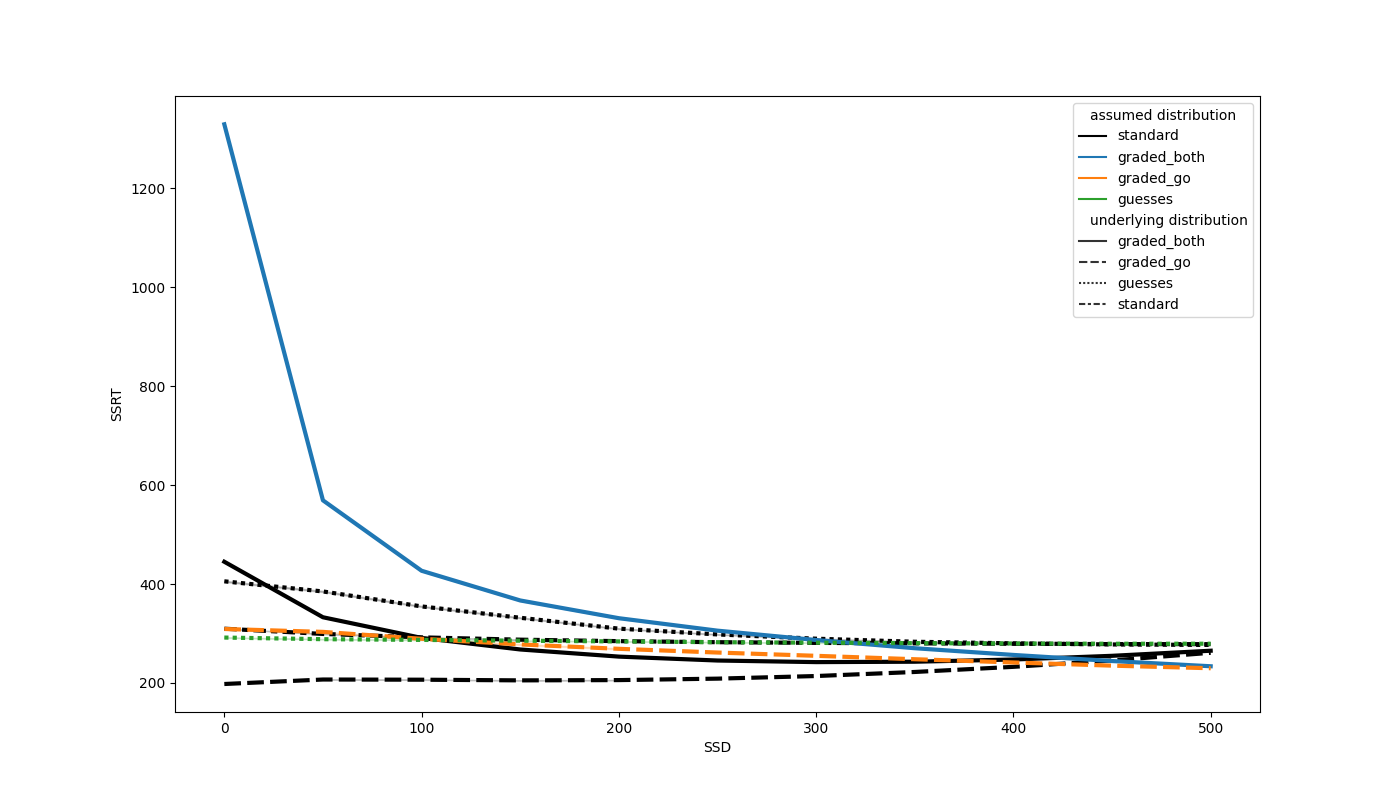

In [4]:
Image('figures/%s/SSRT_by_SSD_supplement.png' % suffix)

# Inhibition Function

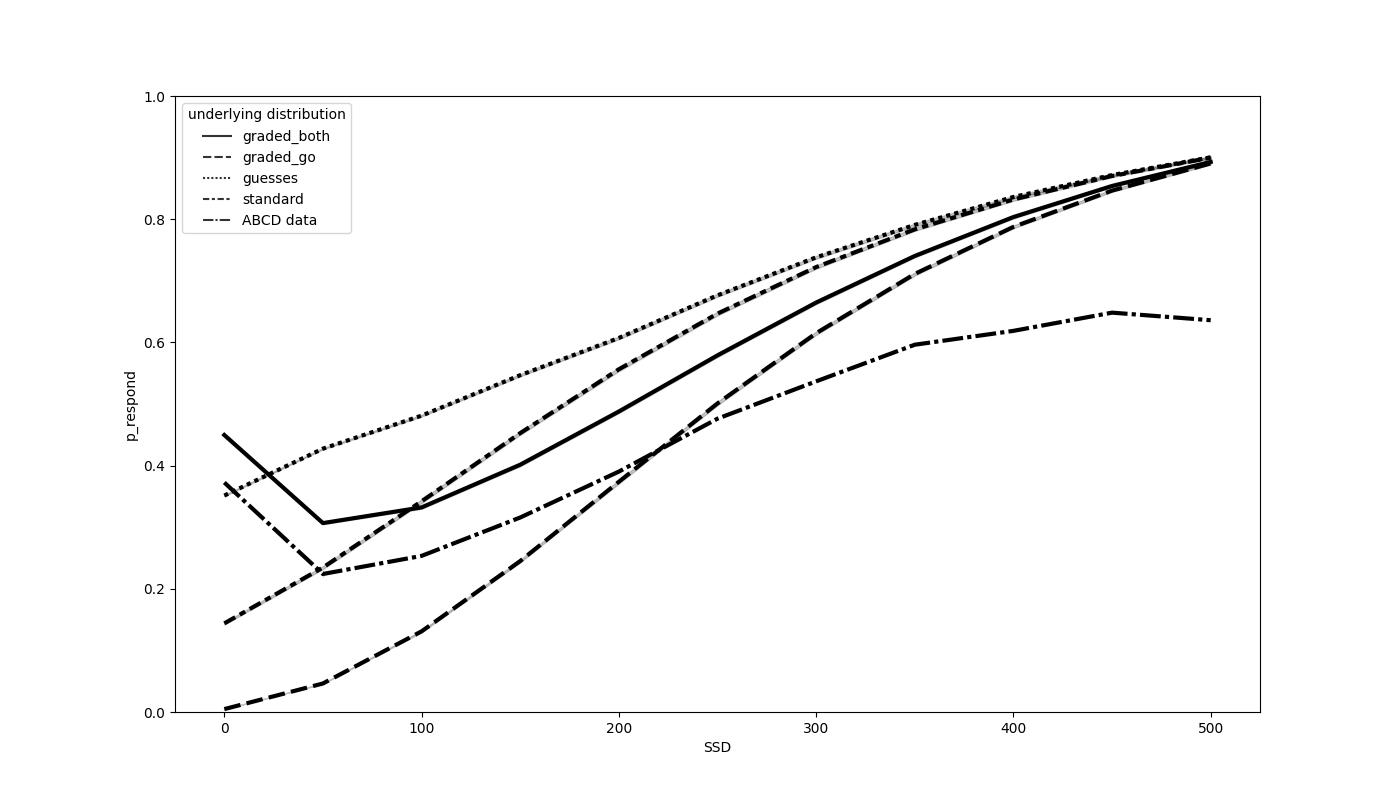

In [5]:
Image('figures/%s/inhibition_function.png' % suffix)

# Individual Differences

In [6]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [7]:
ssrt_df = pd.read_csv('ssrt_metrics/expected_ssrts_%s.csv' % suffix, index_col=0)

# reformatting - was multiindex
ssrt_df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(ssrt_df.loc['underlying distribution', :].values, ssrt_df.columns)]
ssrt_df = ssrt_df.drop(['underlying distribution', 'NARGUID'])

for col in ssrt_df.columns:
    ssrt_df[col] = ssrt_df[col].astype(float)


In [8]:
# sim_rt_info = pd.read_csv('simulated_data/sim_rt_meanStd.csv', index_col = 0)

In [9]:
# getting expect SSRTs
mus_path = 'abcd_data/assigned_mus_%s.json' % suffix
with open(mus_path, 'r') as f:
    mus_dict = json.load(f)
    
mus_df = pd.DataFrame(mus_dict).T

In [10]:
mus_df.head()

,goRT,go,SSRT,stop
003RTV85,459.869390,0.243980,331.395005,0.355372
007W6H7B,368.809477,0.313667,261.141085,0.473617
00CY2MDM,449.321734,0.250425,305.961040,0.390684
00HEV6HB,408.030844,0.279306,306.748683,0.389486
00J52GPG,462.209942,0.242595,277.440297,0.439676


In [11]:
monster_df = pd.concat([mus_df.add_prefix('assigned_'), ssrt_df], 1, sort=True)
monster_df.columns = [col.split('.')[0] for col in monster_df.columns]
monster_df = monster_df.loc[monster_df['gen-standard_SSRT-fixed'].notnull()]

In [12]:
monster_df.shape

(8238, 28)

In [13]:
def make_plot_square(ax):
    lowx, highx = ax.get_xlim()
    lowy, highy = ax.get_ylim()
    low = min(lowx, lowy)
    high = max(highx, highy)
    ax.set_xlim((low, high))
    ax.set_ylim((low, high))
    return ax

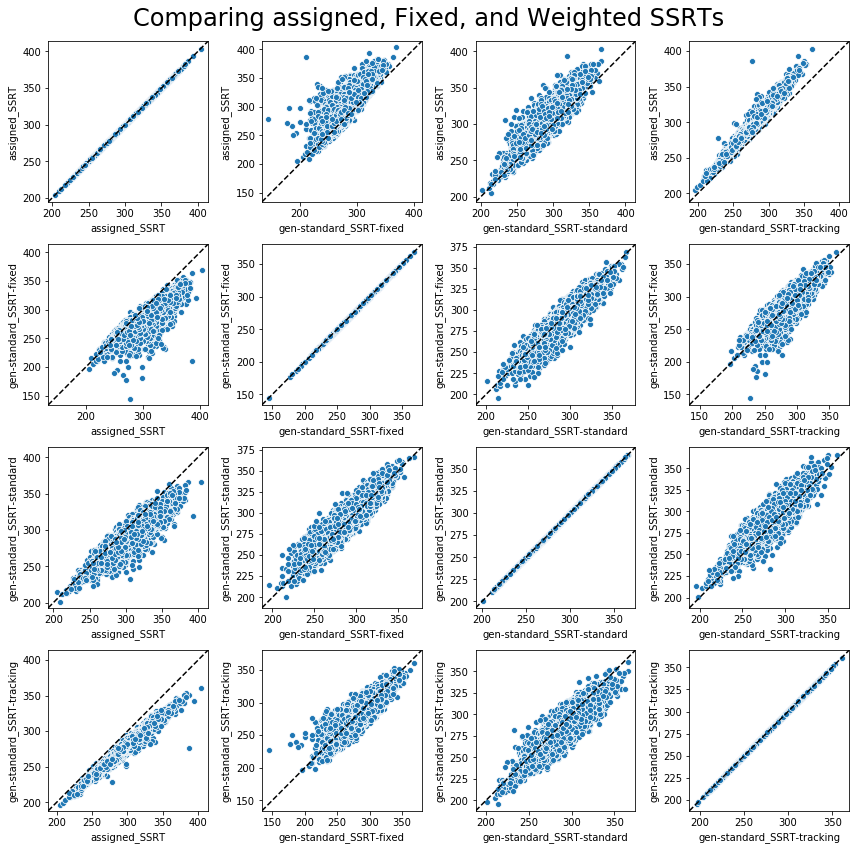

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

columns = ['assigned_SSRT', 'gen-standard_SSRT-fixed', 'gen-standard_SSRT-standard', 'gen-standard_SSRT-tracking']
for idx,coli in enumerate(columns):
    for jdx, colj in enumerate(columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing assigned, Fixed, and Weighted SSRTs', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [15]:
monster_df[columns].corr(method='spearman')

,assigned_SSRT,gen-standard_SSRT-fixed,gen-standard_SSRT-standard,gen-standard_SSRT-tracking
assigned_SSRT,1.000000,0.848332,0.894288,0.981610
gen-standard_SSRT-fixed,0.848332,1.000000,0.915836,0.860442
gen-standard_SSRT-standard,0.894288,0.915836,1.000000,0.891921
gen-standard_SSRT-tracking,0.981610,0.860442,0.891921,1.000000


# Comparing Fixed SSRTs

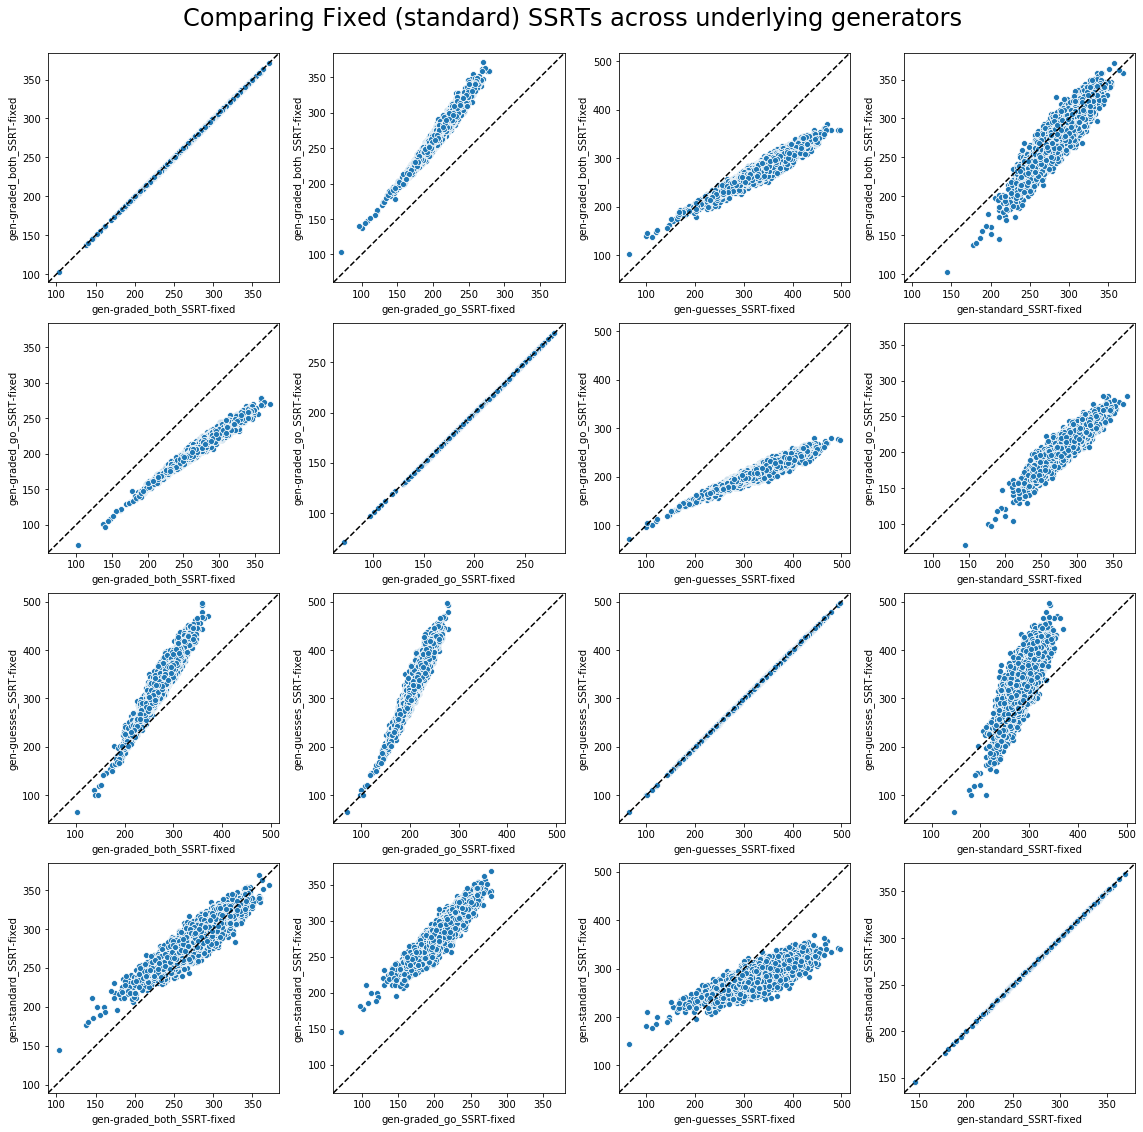

In [16]:
curr_df = monster_df.filter(regex='fixed')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [17]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed
gen-graded_both_SSRT-fixed,1.000000,0.977400,0.952675,0.890551
gen-graded_go_SSRT-fixed,0.977400,1.000000,0.943722,0.895893
gen-guesses_SSRT-fixed,0.952675,0.943722,1.000000,0.765161
gen-standard_SSRT-fixed,0.890551,0.895893,0.765161,1.000000


## (not rescaling the axes to get a closer look)

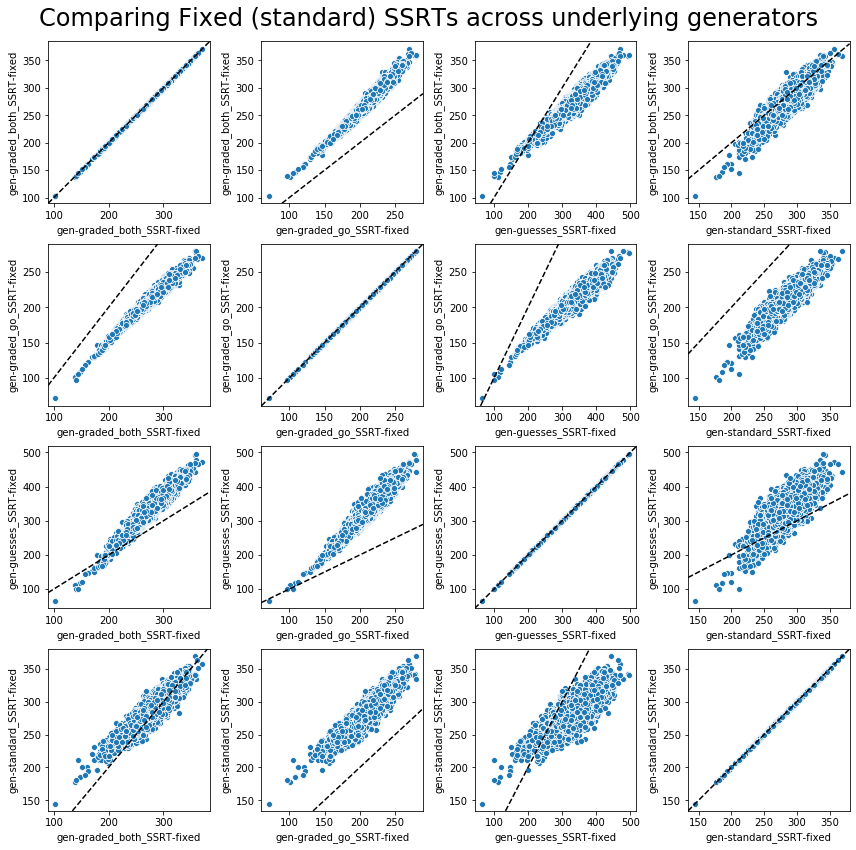

In [18]:
curr_df = monster_df.filter(regex='fixed')
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

# Weighted SSRTs (from randomly assigned SSD distributions)

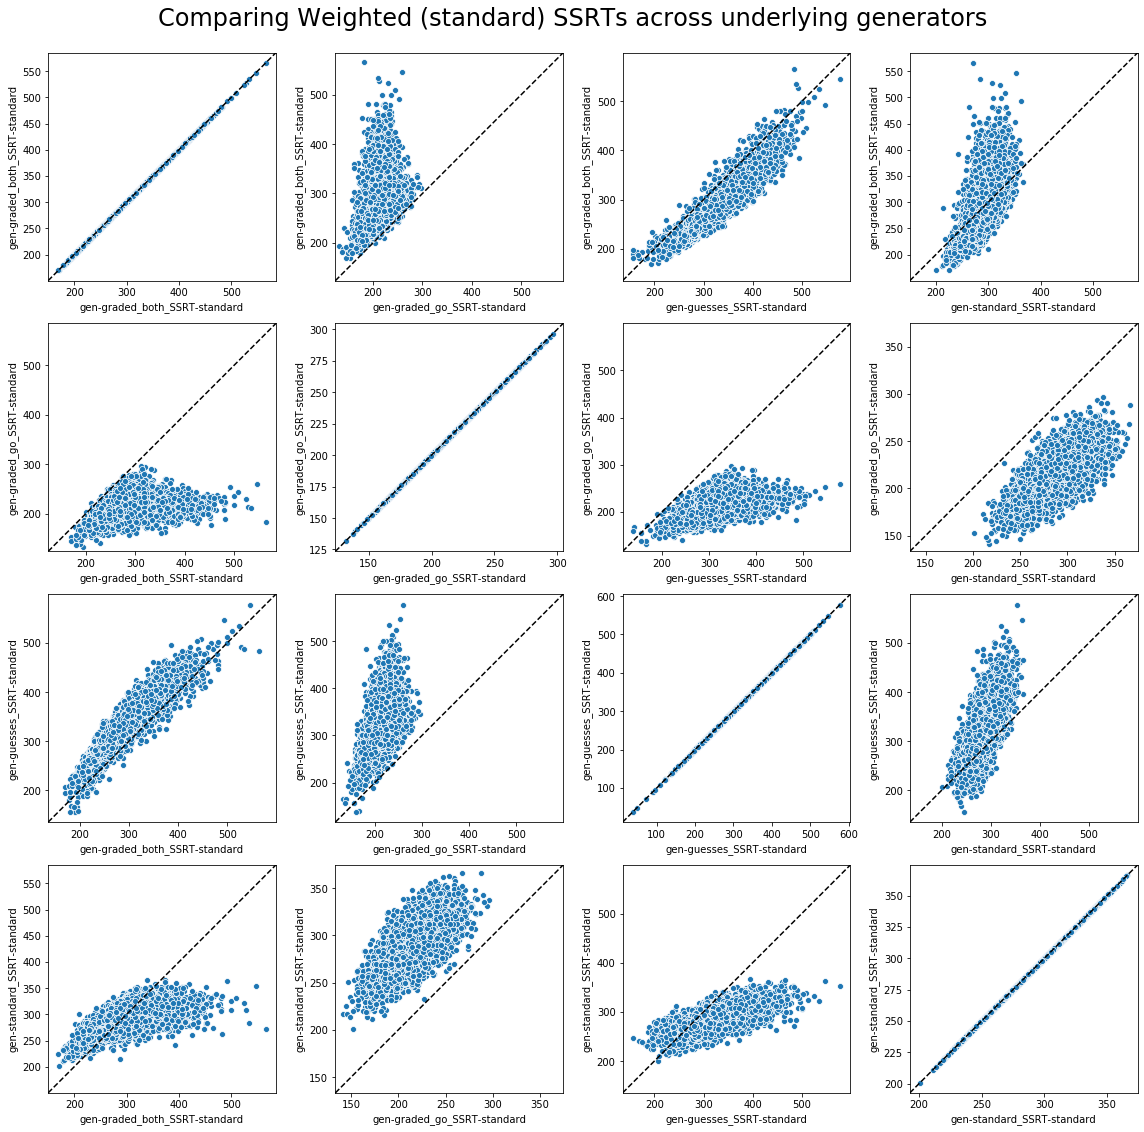

In [19]:
curr_df = monster_df.filter(regex='SSRT-standard')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [20]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard
gen-graded_both_SSRT-standard,1.000000,0.364071,0.928638,0.730267
gen-graded_go_SSRT-standard,0.364071,1.000000,0.427901,0.661626
gen-guesses_SSRT-standard,0.928638,0.427901,1.000000,0.713064
gen-standard_SSRT-standard,0.730267,0.661626,0.713064,1.000000


## not rescaling axis to get a closer look

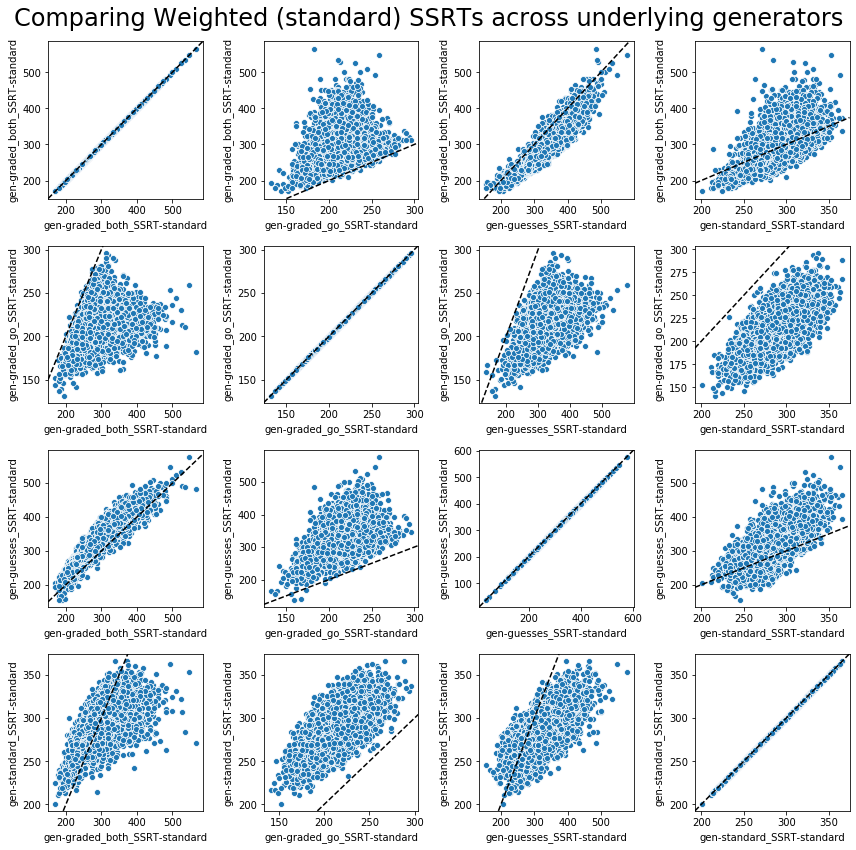

In [21]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

# Tracking-based SSRTs

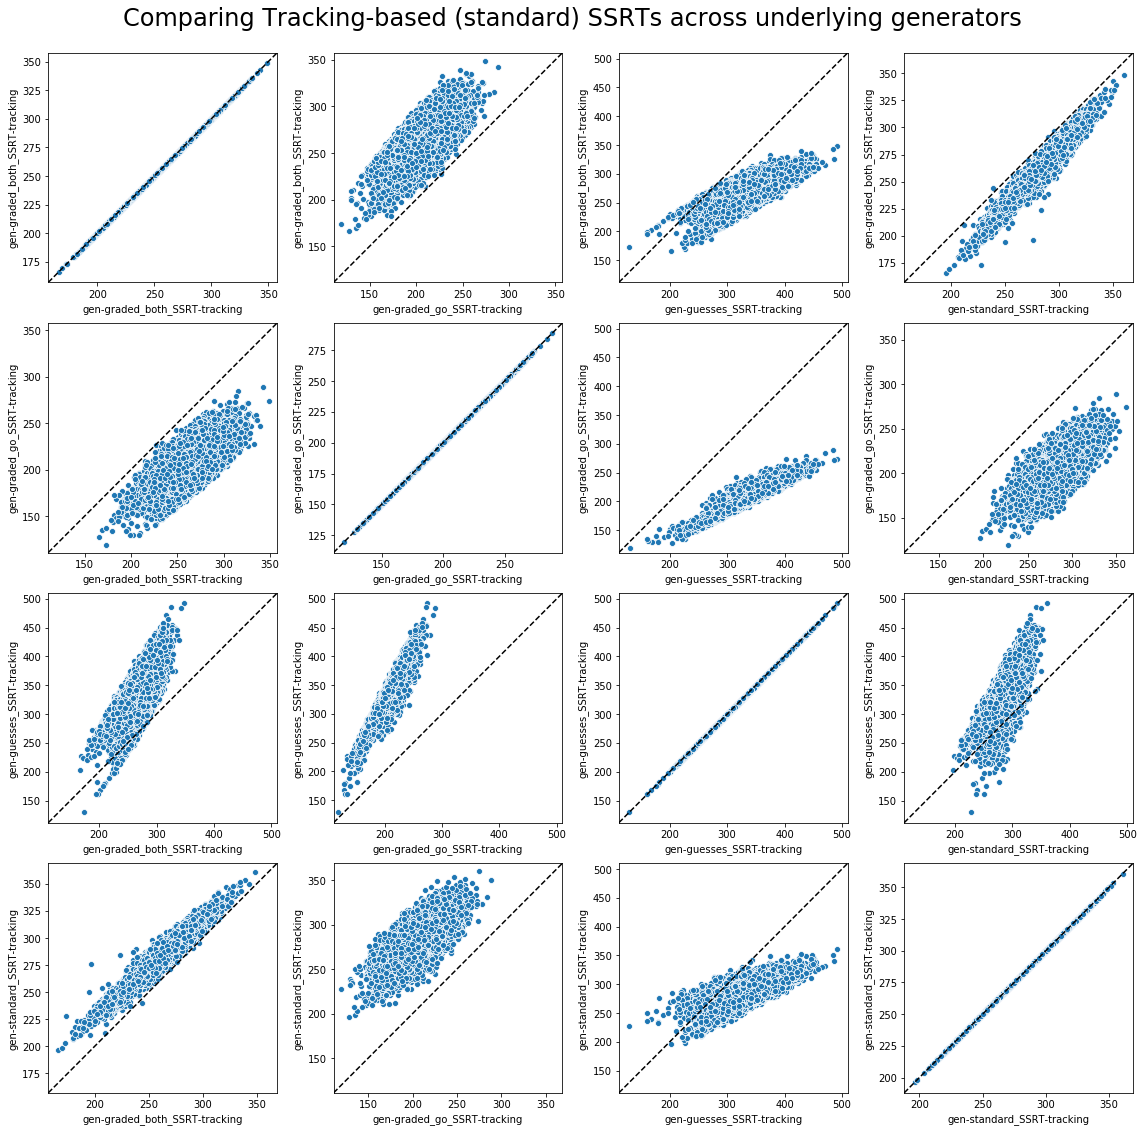

In [22]:
curr_df = monster_df.filter(regex='SSRT-tracking')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Tracking-based (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [23]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
gen-graded_both_SSRT-tracking,1.000000,0.645137,0.719877,0.965121
gen-graded_go_SSRT-tracking,0.645137,1.000000,0.943905,0.677350
gen-guesses_SSRT-tracking,0.719877,0.943905,1.000000,0.754352
gen-standard_SSRT-tracking,0.965121,0.677350,0.754352,1.000000


## not rescaling axes

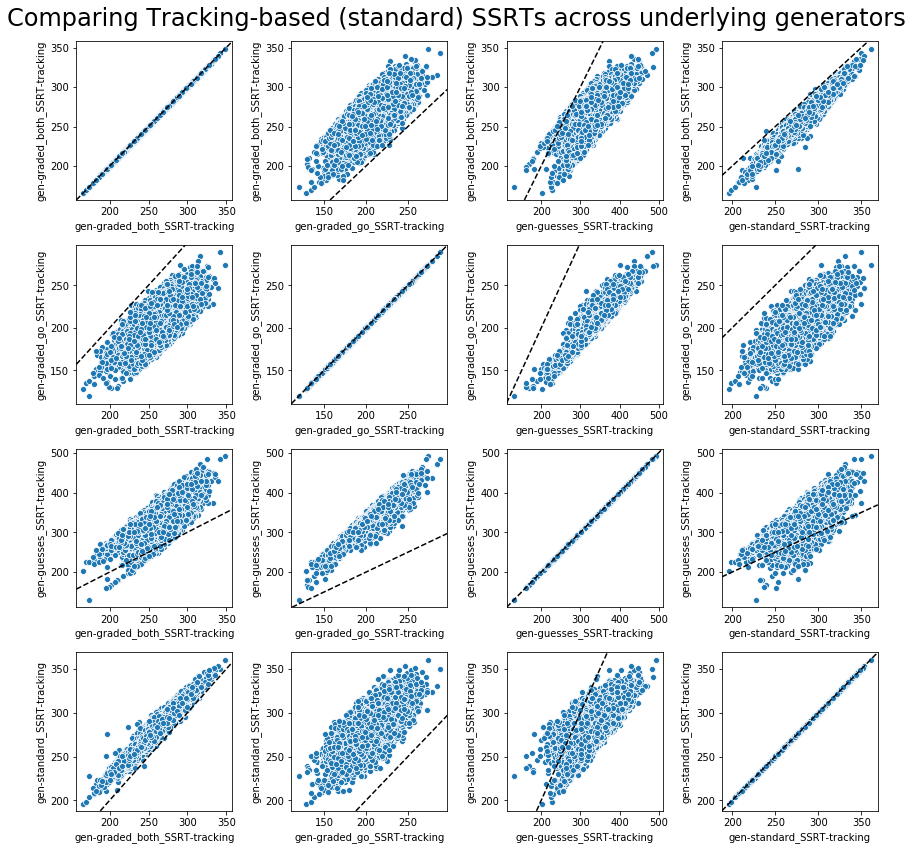

In [24]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Tracking-based (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [25]:
main_cols = ['assigned_SSRT',
             'gen-graded_both_SSRT-standard',
             'gen-graded_go_SSRT-standard',
             'gen-guesses_SSRT-standard',
             'gen-standard_SSRT-standard',
             'gen-graded_both_SSRT-fixed',
             'gen-graded_go_SSRT-fixed',
             'gen-guesses_SSRT-fixed',
             'gen-standard_SSRT-fixed',
             'gen-graded_both_SSRT-tracking',
             'gen-graded_go_SSRT-tracking',
             'gen-guesses_SSRT-tracking',
             'gen-standard_SSRT-tracking']
monster_df[main_cols].describe()

,assigned_SSRT,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
count,8238.000000,8215.000000,8202.000000,8236.000000,8206.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000
mean,301.530191,277.461138,213.496141,319.949002,287.058723,276.066521,211.838432,332.475965,285.052319,260.454151,205.529169,334.699033,281.289212
std,24.909857,44.786522,20.901379,47.629906,21.714737,26.956878,20.086344,45.212107,21.677362,23.903677,21.227446,39.464509,21.423514
min,204.551478,169.833333,131.666667,37.833333,200.854545,103.000000,71.000000,65.000000,145.000000,166.146000,119.368000,129.630000,196.148000
25%,285.061545,247.783559,199.033333,289.133333,272.516667,259.000000,199.000000,304.000000,271.000000,244.602500,190.821000,308.451000,267.085500
50%,301.501834,268.150000,213.016667,314.627119,286.900000,277.000000,213.000000,335.000000,286.000000,260.610000,205.890000,335.045000,281.675000
75%,318.146195,296.300000,227.533333,346.275000,301.779167,294.000000,225.750000,363.000000,300.000000,276.593000,219.778000,361.053000,295.856000
max,403.580206,565.333333,296.387755,577.783333,366.133333,371.000000,279.000000,496.000000,369.000000,348.608000,288.686000,491.992000,360.752000


In [26]:
ssrt_df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-guesses,gen-graded_go_SSRT-guesses.1,gen-guesses_SSRT-guesses.2,gen-standard_SSRT-guesses.3,gen-graded_both_SSRT-graded_go,gen-graded_go_SSRT-graded_go.1,...,gen-guesses_SSRT-graded_both.2,gen-standard_SSRT-graded_both.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking.1,gen-guesses_SSRT-tracking.2,gen-standard_SSRT-tracking.3
gen-graded_both_SSRT-standard,1.000000,0.364071,0.928638,0.730267,0.510993,-0.479444,0.607018,-0.316994,0.699758,0.460729,...,0.716641,0.535237,0.646390,0.633387,0.594147,0.616733,0.453263,0.637548,0.634508,0.477164
gen-graded_go_SSRT-standard.1,0.364071,1.000000,0.427901,0.661626,0.360124,0.528648,0.690229,0.319466,-0.144581,0.335994,...,-0.103630,-0.137719,0.838624,0.854348,0.760263,0.849624,0.670989,0.847369,0.854510,0.698325
gen-guesses_SSRT-standard.2,0.928638,0.427901,1.000000,0.713064,0.295222,-0.466811,0.604181,-0.400766,0.576417,0.408259,...,0.633751,0.405456,0.760579,0.754876,0.755591,0.675904,0.420636,0.748634,0.726887,0.449478
gen-standard_SSRT-standard.3,0.730267,0.661626,0.713064,1.000000,0.686261,0.039965,0.936946,0.266002,0.416105,0.630558,...,0.437597,0.454594,0.743178,0.751168,0.587322,0.915836,0.876471,0.779265,0.836898,0.891921
gen-graded_both_SSRT-guesses,0.510993,0.360124,0.295222,0.686261,1.000000,0.160104,0.694862,0.480651,0.430907,0.542090,...,0.365583,0.529373,0.270516,0.269458,0.084142,0.505992,0.713892,0.312158,0.391779,0.709080
gen-graded_go_SSRT-guesses.1,-0.479444,0.528648,-0.466811,0.039965,0.160104,1.000000,0.192523,0.793394,-0.648474,-0.005943,...,-0.669690,-0.454690,0.100830,0.113990,0.012709,0.228675,0.339563,0.127763,0.169586,0.334903
gen-guesses_SSRT-guesses.2,0.607018,0.690229,0.604181,0.936946,0.694862,0.192523,1.000000,0.406190,0.310338,0.628585,...,0.327118,0.392557,0.701079,0.709809,0.535409,0.892062,0.928861,0.745428,0.810541,0.942796
gen-standard_SSRT-guesses.3,-0.316994,0.319466,-0.400766,0.266002,0.480651,0.793394,0.406190,1.000000,-0.293867,0.234249,...,-0.345711,-0.022772,-0.034020,-0.019527,-0.212139,0.266495,0.580067,0.028310,0.111634,0.550165
gen-graded_both_SSRT-graded_go,0.699758,-0.144581,0.576417,0.416105,0.430907,-0.648474,0.310338,-0.293867,1.000000,0.639487,...,0.975879,0.909841,0.124570,0.123339,0.075063,0.176170,0.209302,0.134156,0.151070,0.213314
gen-graded_go_SSRT-graded_go.1,0.460729,0.335994,0.408259,0.630558,0.542090,-0.005943,0.628585,0.234249,0.639487,1.000000,...,0.659364,0.770715,0.373215,0.383005,0.245219,0.525054,0.602759,0.407013,0.452885,0.608295


## How many subs survived (i.e. didn't have non-null SSRTs)

This can occur during the weighted method if one of their SSD-specific SSRTs is null. Not sure if you want me to fix.

In [27]:
monster_df.columns

options = ['standard', 'guesses', 'graded_go', 'graded_both']

for gen_str in options:
    for ssrt_str in options:
        col = 'gen-%s_SSRT-%s' % (gen_str, ssrt_str)
        print(col, len(monster_df.loc[monster_df[col].notnull()]))

gen-standard_SSRT-standard 8206
gen-standard_SSRT-guesses 8206
gen-standard_SSRT-graded_go 8206
gen-standard_SSRT-graded_both 8206
gen-guesses_SSRT-standard 8236
gen-guesses_SSRT-guesses 8236
gen-guesses_SSRT-graded_go 8236
gen-guesses_SSRT-graded_both 8236
gen-graded_go_SSRT-standard 8202
gen-graded_go_SSRT-guesses 8202
gen-graded_go_SSRT-graded_go 8202
gen-graded_go_SSRT-graded_both 8202
gen-graded_both_SSRT-standard 8215
gen-graded_both_SSRT-guesses 8215
gen-graded_both_SSRT-graded_go 8215
gen-graded_both_SSRT-graded_both 8215


# Plot graded Mu Go function

In [28]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/scripts/utils.py:342: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


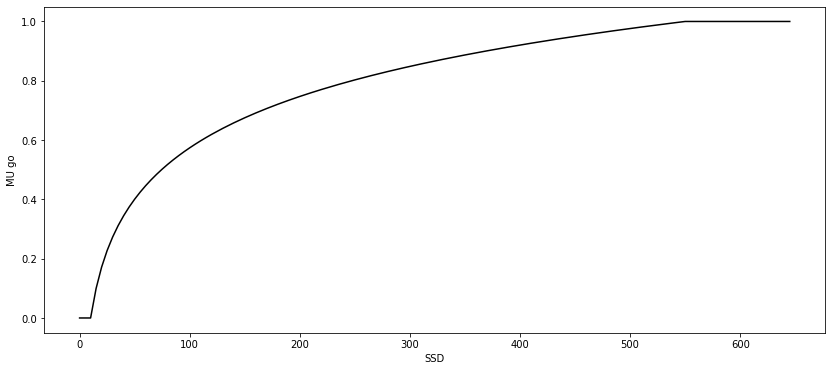

In [29]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')